In [5]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2021-01-11

numpy     : 1.18.5
pandas    : 1.0.5
matplotlib: 3.3.3



In [7]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))

3
7


In [36]:
import numpy as np


class Perceptron(object):
    """퍼센트론 분류기
    
    매개변수
    ------------
    eta : float
        학습률 (0.0과 1.0 사이)
        n_iter : int
            훈련 데이터셋 반복횟수
        random_state : int
            가중치 무작위 초기화를 위한 난수 생성기 시드
    속성
    -----------
    w_ : 1d-array
        학습된 가중치
    erros_ : list
        에포크마다 누적된 분류 오류
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [37]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

In [51]:
import pandas as pd

df = pd.read_csv("iris.csv")

In [53]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 불꽃 데이터 그래프 그리기

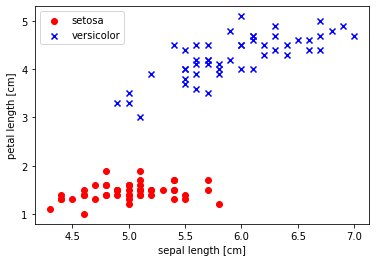

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택

y = df.iloc[0:100, 4].values
y = np.where(y=='setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0], X[:50,1],
            color='red', marker = 'o', label = 'setosa')
            
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()
            

## 퍼셉트론 모델 훈련하기

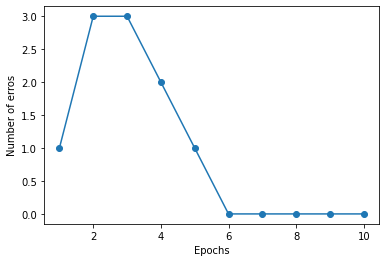

In [55]:
ppn = Perceptron(eta = 0.1, n_iter = 10)

ppn.fit(X,y)


plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of erros')

plt.show()

    Iris 데이터셋에서 추출한 일부 데이터에서 퍼셉트론 알고리즘 훈련을 한 후,
    에포크 대비 잘못된 분류된 오차를 나타냄.

## 결정 경계 그래프 함수

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y classfire, resoloution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() -1, X[:]